In [48]:
#!pip3 install torch torchvision torchaudio
#!pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
#!pip install decorator
#!pip install -U matplotlib

#!pip install -U networkx
#!pip install -U scipy


  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [30]:
import torch
from torch_geometric.data import Data

#tensör çok boyutlu, ve tek tip veri tutabilen bir matris olarak düşünülebilir. 
#bizim örneğimizde iki boyutlu bir yapımız var. 
#çizgenin kenarlarını koordinat formatında tutuyoruz. 
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)

#nokta özellikleri - bu örnekte her noktanın tek boyutlu bir
#özellik vektörü var. bu özellikler float olarak belirlenmiş.
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

#n noktalı, m kenarlı bir çizge için, noktaların k özelliği varsa
#x: n x k'lık bir matris
#edge_index: 2 x m'lik bir matris
data = Data(x=x, edge_index=edge_index)

print(data)

Data(x=[3, 1], edge_index=[2, 4])


Graph with 3 nodes and 2 edges


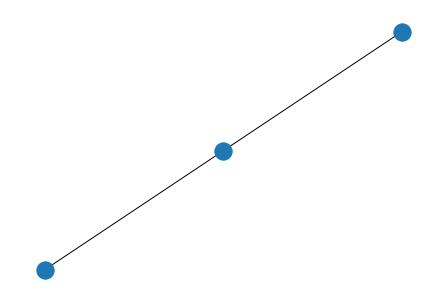

In [31]:
import networkx as nx
from torch_geometric.utils import to_networkx, from_networkx
G = to_networkx(data, to_undirected=True)
print(G)
nx.draw(G)

In [32]:
#Bir önceki örnekte COO çizge formatındaki gibi kenarların
#başlangıç ve bitiş noktası verilmişti. Eğer elinizde kenar
#ikilileri varsa tensörün devriğini alıp girdi olarak verebilirsiniz. 

import torch
from torch_geometric.data import Data

#basit, yönsüz bir çizge için listede her kenar iki kere gözüküyor.
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t())


In [33]:
print(data.keys)

['x', 'edge_index']


In [34]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [35]:
for key, item in data:
    print("{} found in data".format(key))

x found in data
edge_index found in data


In [36]:
'edge_attr' in data

False

In [37]:
data.num_nodes

3

In [38]:
data.num_edges

4

In [39]:
data.num_node_features

1

In [42]:
data.is_directed()

False

In [43]:
#device = torch.device('cuda')
#data = data.to(device)

In [44]:
#pytorch geometric kütüphanesinin içerisindeki örnek çizgeleri de kullanabiliriz

#TU Dortmund Üniversitesi'nden toplanan "IMDB-BINARY", "REDDIT-BINARY" veya "PROTEINS" 
#gibi çeşitli çizge çekirdeği kıyaslama veri kümeleri.
from torch_geometric.datasets import TUDataset

#ENZYMES, BRENDA enzim veri tabanından elde edilen 600 protein  
#yapısından oluşan bir veri setidir. Bu veri seti 6 farklı enzim içerir.
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
print(dataset)
print('Çizge sayısı:', len(dataset))
print('Sınıf sayısı:', dataset.num_classes)
print('Özellik sayısı:', dataset.num_node_features)

print('İlk çizge:', dataset[0])
print('İlk çizge x:', dataset[0].x)
print('İlk çizge y:', dataset[0].y)


ENZYMES(600)
Çizge sayısı: 600
Sınıf sayısı: 6
Özellik sayısı: 3
İlk çizge: Data(edge_index=[2, 168], x=[37, 3], y=[1])
İlk çizge x: tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])
İlk çizge y: tensor([5])


Çizge sayısı: 2349
Sınıf sayısı: 50
Nokta özellik sayısı: 3
İlk çizge: Data(x=[2541, 3], y=[2541], pos=[2541, 3], category=[1], edge_index=[2, 15246])
İlk çizge x: tensor([[-0.0063,  0.1771,  0.9842],
        [ 0.0975,  0.8018, -0.5895],
        [-0.1128,  0.1383,  0.9839],
        ...,
        [-0.1087,  0.3088, -0.9449],
        [ 0.6730,  0.6764, -0.2991],
        [ 0.1489, -0.6604, -0.7360]])
İlk çizge y: tensor([0, 3, 2,  ..., 3, 0, 0])
Yönsüz: False


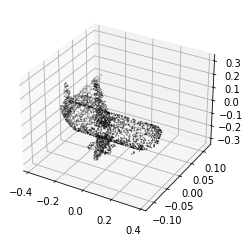

In [45]:
import torch_geometric.transforms as T
import networkx as nx
from torch_geometric.datasets import ShapeNet
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#nokta bulutları gibi geometrik yapıların da transform kütüphanesi
#ile kullanımı mümkün olabilir. 
dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'], pre_transform=T.KNNGraph(k=6))

xyz = dataset[2].pos.detach().numpy()
ax = plt.axes(projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = 'black', s=0.1)

print('Çizge sayısı:', len(dataset))
print('Sınıf sayısı:' , dataset.num_classes)
print('Nokta özellik sayısı:', dataset.num_node_features)

print('İlk çizge:', dataset[2])
print('İlk çizge x:', dataset[2].x)
print('İlk çizge y:', dataset[2].y)

print('Yönsüz:', dataset[2].is_undirected())

In [46]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/tmp/Cora', name='Cora')

#Cora veri seti, yedi sınıftan birinden gelen 2708 bilimsel yayından oluşur.
#Alıntı ağı 5429 bağlantıdan oluşmaktadır. Veri setindeki her yayın, sözlükte karşılık 
#gelen kelimenin yokluğunu/mevcudiyetini gösteren 0/1-değerli bir kelime vektörü ile tanımlanır. 
#Sözlük 1433 farkl kelimeden oluşmaktadır.

print('Çizge sayısı:', len(dataset))
print('Nokta sınıf sayısı:' , dataset.num_classes)
print('Nokta özellik sayısı:', dataset.num_node_features)

print('İlk çizge:', dataset[0])
print('İlk çizge x:', dataset[0].x)
print('İlk çizge y:', dataset[0].y)

print('Yönsüz:', dataset[0].is_undirected())

Çizge sayısı: 1
Nokta sınıf sayısı: 7
Nokta özellik sayısı: 1433
İlk çizge: Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
İlk çizge x: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
İlk çizge y: tensor([3, 4, 4,  ..., 3, 3, 3])
Yönsüz: True
